In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Data of acci.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [5]:
data.describe(include='all')

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
count,50000,50000,50000,50000,50000,50000.000000,50000
unique,8734,4,28,3,3,NaN,9
top,04-03-2003,Night,Florida,Foggy,Fine,NaN,Poor Visibility
freq,15,16704,1864,16729,16737,NaN,5694
mean,NaN,NaN,NaN,NaN,NaN,4.983040,NaN
std,NaN,NaN,NaN,NaN,NaN,3.160581,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN


In [6]:
data.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [7]:
data.columns

Index(['AccidentDate', 'Timing', 'State', 'WeatherCondition', 'RoadCondition',
       'Deaths', 'Reason'],
      dtype='object')

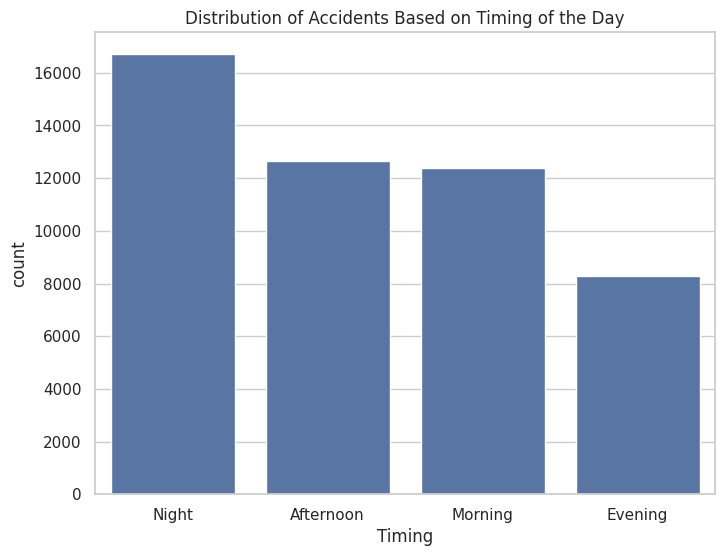

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=data, order=data['Timing'].value_counts().index)
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

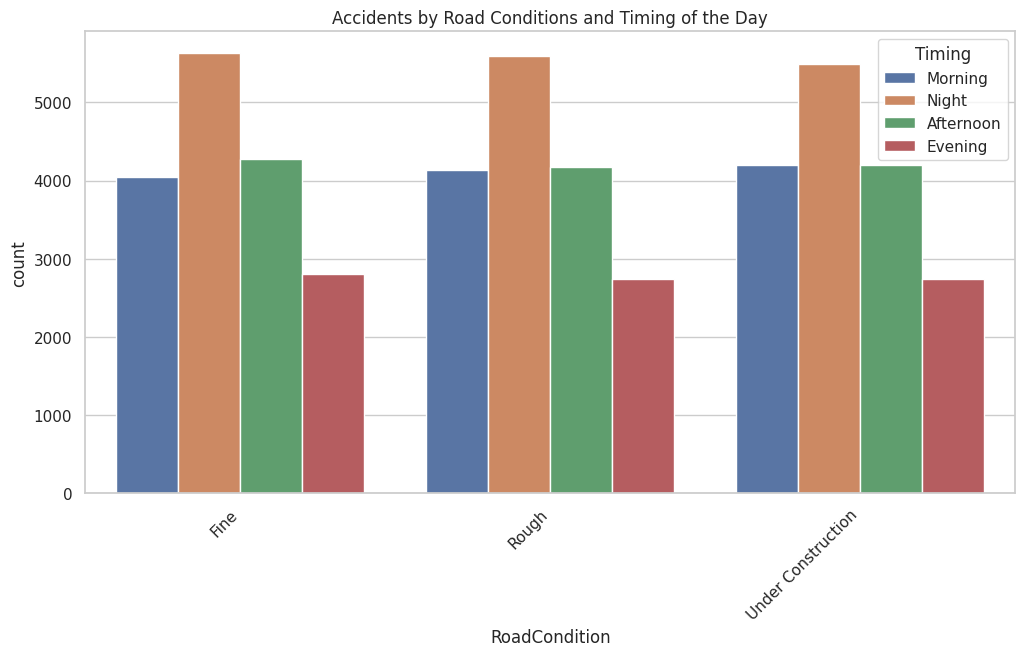

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=data, order=data['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4000x800 with 0 Axes>

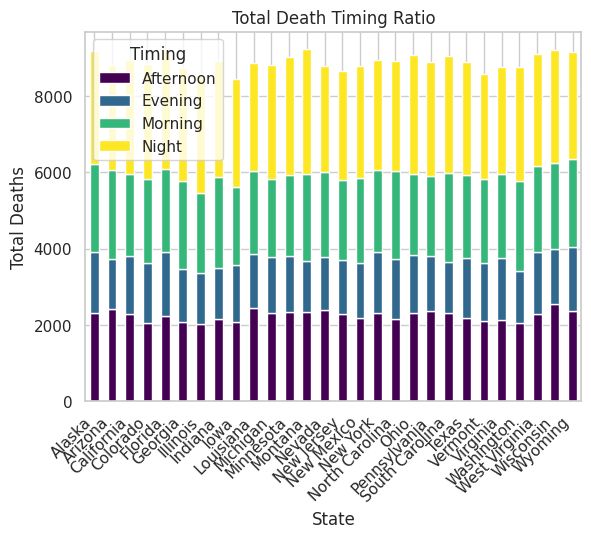

In [8]:
sns.set(style="whitegrid")

st_ti_deaths = data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

st_ti_deaths_pivot = st_ti_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

plt.figure(figsize=(40, 8))
st_ti_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()

<Figure size 4000x800 with 0 Axes>

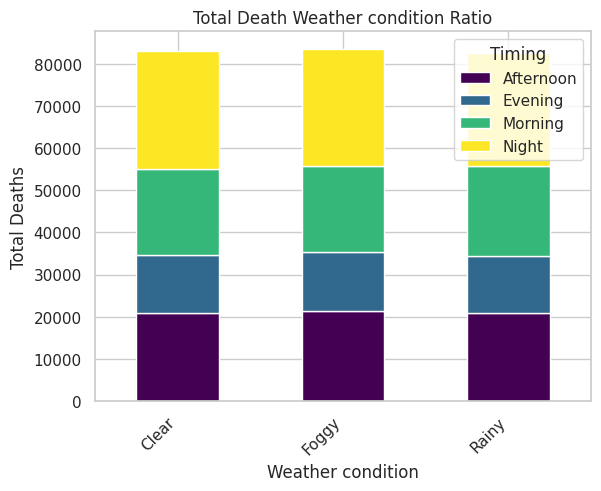

In [9]:
sns.set(style="whitegrid")

wea_ti_deaths = data.groupby(['WeatherCondition', 'Timing'])['Deaths'].sum().reset_index()

wea_ti_deaths_pivot = wea_ti_deaths.pivot(index='WeatherCondition', columns='Timing', values='Deaths').fillna(0)

plt.figure(figsize=(40, 8))
wea_ti_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Weather condition Ratio")
plt.xlabel("Weather condition")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()

<Figure size 4000x800 with 0 Axes>

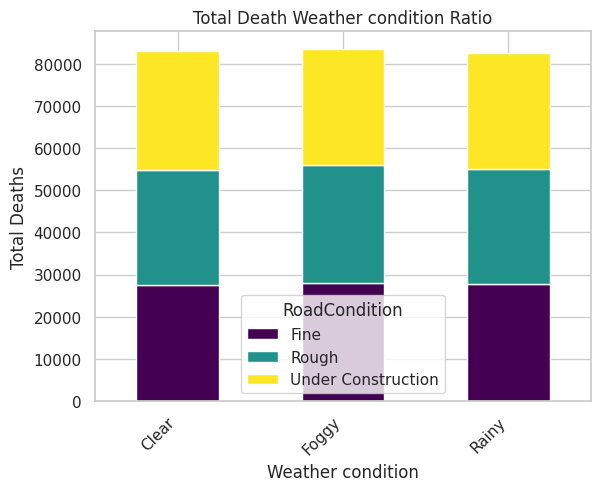

In [11]:
sns.set(style="whitegrid")

wea_ro_deaths = data.groupby(['WeatherCondition', 'RoadCondition'])['Deaths'].sum().reset_index()

wea_ro_deaths_pivot = wea_ro_deaths.pivot(index='WeatherCondition', columns='RoadCondition', values='Deaths').fillna(0)

plt.figure(figsize=(40, 8))
wea_ro_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Weather condition Ratio")
plt.xlabel("Weather condition")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="RoadCondition")
plt.show()

<Figure size 4000x800 with 0 Axes>

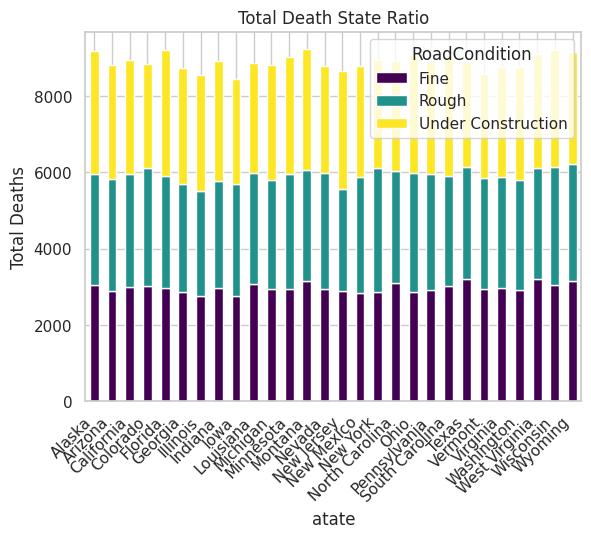

In [12]:
sns.set(style="whitegrid")

st_ro_deaths = data.groupby(['State', 'RoadCondition'])['Deaths'].sum().reset_index()

st_ro_deaths_pivot = st_ro_deaths.pivot(index='State', columns='RoadCondition', values='Deaths').fillna(0)

plt.figure(figsize=(40, 8))
st_ro_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death State Ratio")
plt.xlabel("atate")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="RoadCondition")
plt.show()